# Graphique de comparaison des méthodes de sélection de features

In [4]:

import matplotlib.pyplot as plt
import pandas as pd


In [5]:
path_ = "../CSV/results.csv"

### Lecture du fichier CSV

In [6]:
data = pd.read_csv(path_)

### Créer un tableau de 5 valeurs de penalizer pour chaque nombre de features

In [7]:
penalizers = [1e-5]*5 + [1e-4]*5 + [1e-3]*5 + [1e-2]*5
df_penalizers = pd.DataFrame({'penalizer': penalizers*10})

In [8]:
# concaténer les dataframes
data = pd.concat([data, df_penalizers], axis=1)

### Sauvegarder les données mises à jour dans le fichier CSV

In [10]:
data.to_csv('../CSV/results2.csv', index=False)

### Lecture du fichier nouveau CSV avec penalizer

In [11]:
data_penalizer = pd.read_csv("../CSV/results2.csv")

### Réorganisation des données avec la méthode pivot

In [12]:
pivot_data_uncorrected = data_penalizer.pivot_table(index='n_feats', columns='method', values='cindex', aggfunc='mean')
pivot_data_corrected = data_penalizer.pivot_table(index='n_feats', columns='method', values='cindex_opt', aggfunc='mean')

### Récupération des bounds d'erreur à partir de la colonne ebm

In [13]:
ebm = data_penalizer.pivot_table(index='n_feats', columns='method', values='ebm', aggfunc='first')

## Uncorrected C-index graph

Text(0.5, 1.0, 'Uncorrected C-index en fonction de la méthode et du nombre de features')

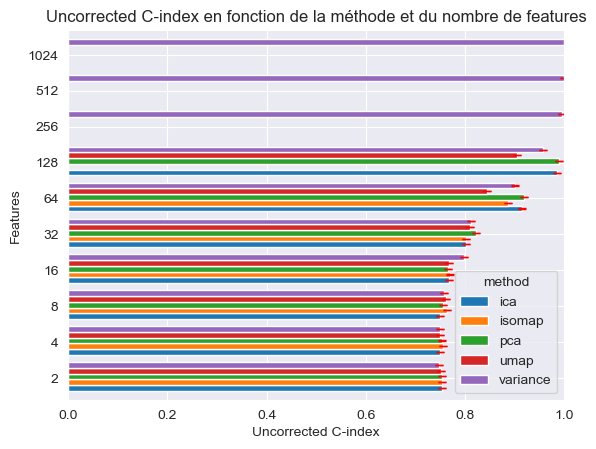

In [23]:
# Création de la figure et du sous-plot
fig1, ax1 = plt.subplots()

# Tracé des colonnes avec la méthode errorbar
bar_plot = pivot_data_uncorrected.plot(kind='barh', ax=ax1, yerr=ebm, capsize=3, error_kw=dict(ecolor='red',elinewidth=0.5), position=0.45, width=0.8)

# Personnalisation de l'axe des y
ax1.set_ylabel('Features')
y_ticks = [2**n for n in pivot_data_uncorrected.index] # Liste des puissances de 2 correspondant aux nombres de features
y_positions = range(len(pivot_data_uncorrected)) # Plage d'indices de pivot_data
ax1.set_yticks(y_positions) # Définition des positions des étiquettes
ax1.set_yticklabels(y_ticks) # Remplacement des étiquettes par les puissances de 2 correspondantes
# Personnalisation de l'axe des x
ax1.set_xlabel('Uncorrected C-index')
ax1.set_xlim(0.0, 1.0)
# Titre du graphique
ax1.set_title('Uncorrected C-index en fonction de la méthode et du nombre de features')

## Corrected C-index graph

Text(0.5, 1.0, 'Corrected C-index en fonction de la méthode et du nombre de features')

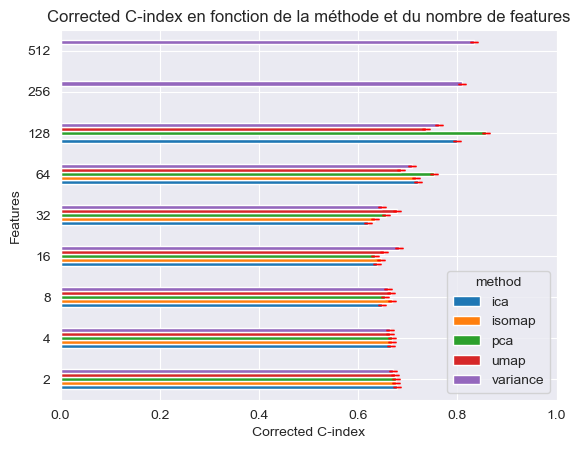

In [22]:
# Création de la figure et du sous-plot
fig2, ax2 = plt.subplots()

# Tracé des colonnes avec la méthode errorbar
pivot_data_corrected.plot(kind='barh', ax=ax2, yerr=ebm, capsize=3, error_kw=dict(ecolor='red',elinewidth=0.5))

# Personnalisation de l'axe des y
ax2.set_ylabel('Features')
y_ticks = [2**n for n in pivot_data_corrected.index] # Liste des puissances de 2 correspondant aux nombres de features
y_positions = range(len(pivot_data_corrected)) # Plage d'indices de pivot_data
ax2.set_yticks(y_positions) # Définition des positions des étiquettes
ax2.set_yticklabels(y_ticks) # Remplacement des étiquettes par les puissances de 2 correspondantes

# Personnalisation de l'axe des y
ax2.set_xlabel('Corrected C-index')
ax2.set_xlim(0.0, 1.0)
# Titre du graphique
ax2.set_title('Corrected C-index en fonction de la méthode et du nombre de features')

## Comparaison des penalizer selon les méthodes

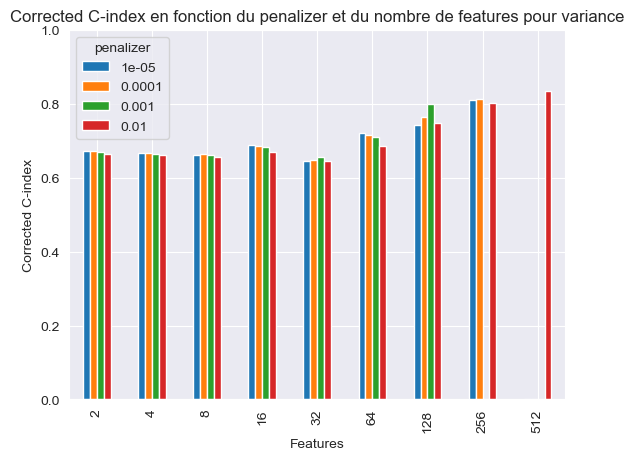

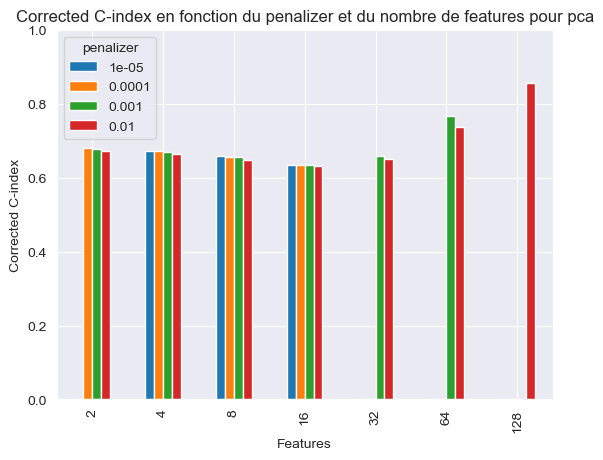

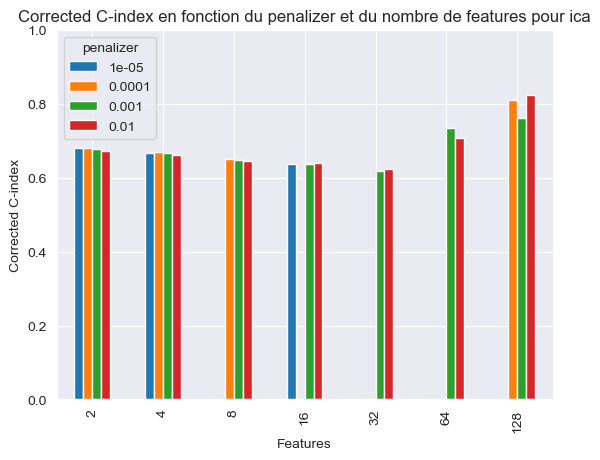

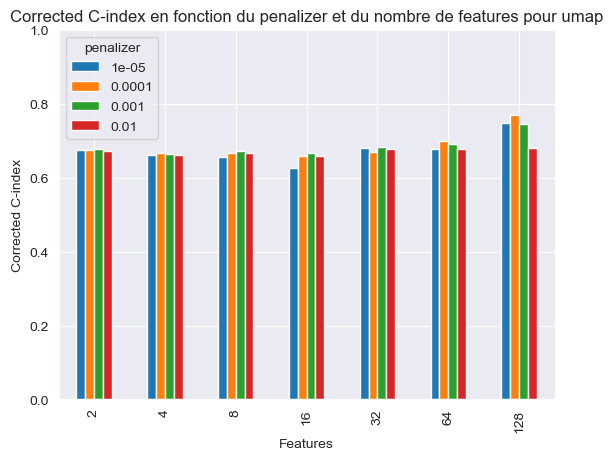

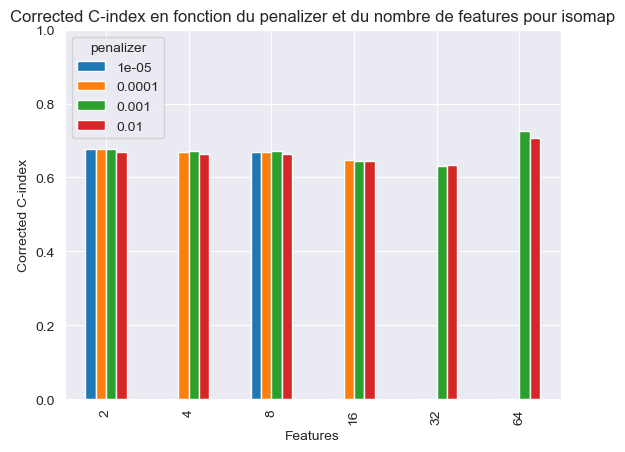

In [24]:
# Liste des noms de méthodes
method_names = ['variance', 'pca', 'ica', 'umap', 'isomap']

# Boucle pour créer un graphique pour chaque méthode
for method_name in method_names:
    # Filtrage des données pour la méthode en cours
    data_method = data_penalizer[data_penalizer['method'] == method_name]

    # Reorganisation des données avec la méthode pivot pour les penalizers
    pivot_data_penalizer = data_method.pivot_table(index='n_feats', columns='penalizer', values='cindex_opt', aggfunc='mean')

    # Création de la figure et du sous-plot
    fig, ax = plt.subplots()

    # Tracé des colonnes
    pivot_data_penalizer.plot(kind='bar', ax=ax)

    # Personnalisation de l'axe des x
    ax.set_xlabel('Features')
    x_ticks = [2**n for n in pivot_data_penalizer.index] # Liste des puissances de 2 correspondant aux nombres de features
    x_positions = range(len(pivot_data_penalizer)) # Plage d'indices de pivot_data
    ax.set_xticks(x_positions) # Définition des positions des étiquettes
    ax.set_xticklabels(x_ticks) # Remplacement des étiquettes par les puissances de 2 correspondantes

    # Personnalisation de l'axe des y
    ax.set_ylabel('Corrected C-index')
    ax.set_ylim(0.0, 1.0)
    # Titre du graphique
    ax.set_title(f'Corrected C-index en fonction du penalizer et du nombre de features pour {method_name}')

    # Affichage du graphique
    plt.show()


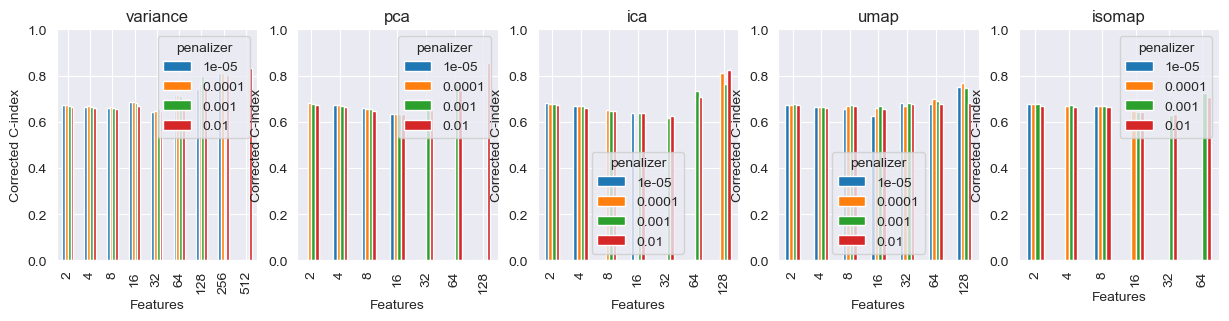

In [25]:
# Création de la figure avec 5 sous-graphiques
figs, axs = plt.subplots(ncols=5, figsize=(15, 3))

# Liste des noms de méthodes
method_names = ['variance', 'pca', 'ica', 'umap', 'isomap']

# Boucle pour tracer chaque graphique dans un sous-graphique
for i, method_name in enumerate(method_names):
    # Filtrage des données pour la méthode en cours
    data_method = data_penalizer[data_penalizer['method'] == method_name]

    # Reorganisation des données avec la méthode pivot pour les penalizers
    pivot_data_penalizer = data_method.pivot_table(index='n_feats', columns='penalizer', values='cindex_opt', aggfunc='mean')

    # Tracé des colonnes dans le sous-graphique correspondant
    pivot_data_penalizer.plot(kind='bar', ax=axs[i])

    # Personnalisation de l'axe des x
    axs[i].set_xlabel('Features')
    x_ticks = [2**n for n in pivot_data_penalizer.index] # Liste des puissances de 2 correspondant aux nombres de features
    x_positions = range(len(pivot_data_penalizer)) # Plage d'indices de pivot_data
    axs[i].set_xticks(x_positions) # Définition des positions des étiquettes
    axs[i].set_xticklabels(x_ticks) # Remplacement des étiquettes par les puissances de 2 correspondantes

    # Personnalisation de l'axe des y
    axs[i].set_ylabel('Corrected C-index')
    axs[i].set_ylim(0.0, 1.0)
    # Titre du sous-graphique
    axs[i].set_title(method_name)


# Affichage de la figure
plt.show()

## Comparaison des résultats selon les méthodes

### ICA

###### Best uncorrected C-index = 1
###### Best corrected C-index = 0.823
###### Best penalizer for corrected C-index = 0.01
###### Features for corrected C-index = 128

### Variance

###### Best uncorrected C-index = 1
###### Best corrected C-index = 0.834
###### Best penalizer for corrected C-index = 0.01
###### Features for corrected C-index = 512

### PCA

###### Best uncorrected C-index = 0.998
###### Best corrected C-index = 0.857
###### Best penalizer for corrected C-index = 0.01
###### Features for corrected C-index = 128

### UMAP

###### Best uncorrected C-index = 0.956
###### Best corrected C-index = 0.768
###### Best penalizer for corrected C-index = 0.0001
###### Features for corrected C-index = 128

### ISOMAP

###### Best uncorrected C-index = 0.887
###### Best corrected C-index = 0.725
###### Best penalizer for corrected C-index = 0.001
###### Features for corrected C-index = 64